Texas accidents and the Weather

From 2017 to 2019, there were 248,299 traffic accidents on Texas roads.  What role did weath play in those accidents?

In [1]:
#Creating Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
#Open Texas Traffic CSV File

traffic_df = pd.read_csv("../data/outTX.csv")
traffic_df

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,m_start,m_end,s_start,s_end,sec_start,sec_end,duration,season_start,season_end,day_of_week
0,267710,A-267712,MapQuest,201.0,2,2017-01-02 14:40:12,2017-01-02 15:39:53,30.393579,-97.745979,NaN,...,40,39,12,53,52812,56393,3581,winter,1,Monday
1,267711,A-267713,MapQuest,201.0,2,2017-01-02 14:28:48,2017-01-02 15:28:36,30.256216,-97.722038,NaN,...,28,28,48,36,52128,55716,3588,winter,1,Monday
2,267712,A-267714,MapQuest,201.0,2,2017-01-02 14:04:17,2017-01-02 15:05:00,30.418287,-97.700874,NaN,...,4,5,17,0,50657,54300,3643,winter,1,Monday
3,267713,A-267715,MapQuest,201.0,2,2017-01-02 14:29:13,2017-01-02 15:35:00,30.237938,-97.696167,NaN,...,29,35,13,0,52153,56100,3947,winter,1,Monday
4,267714,A-267716,MapQuest,201.0,2,2017-01-02 14:40:51,2017-01-02 15:40:23,30.364882,-97.695992,NaN,...,40,40,51,23,52851,56423,3572,winter,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248293,3513349,A-3513513,Bing,NaN,2,2019-08-23 13:16:19,2019-08-23 13:45:28,29.749589,-95.456110,29.742630,...,16,45,19,28,47779,49528,1749,summer,8,Friday
248294,3513350,A-3513514,Bing,NaN,3,2019-08-23 13:04:19,2019-08-23 13:33:52,29.778089,-95.373146,29.774183,...,4,33,19,52,47059,48832,1773,summer,8,Friday
248295,3513351,A-3513515,Bing,NaN,3,2019-08-23 13:00:34,2019-08-23 13:30:14,29.774190,-95.320940,29.774180,...,0,30,34,14,46834,48614,1780,summer,8,Friday
248296,3513353,A-3513517,Bing,NaN,3,2019-08-23 16:44:23,2019-08-23 17:11:49,29.941686,-95.295187,29.926120,...,44,11,23,49,60263,61909,1646,summer,8,Friday


In [51]:
#Creat Data to review accidents by season

seasons_df=traffic_df[['season_start', 'Severity']]
seasonsgroup_df=seasons_df.groupby(['season_start'])
seasonsgroup_df.count()


,Severity
season_start,
fall,64670
spring,61900
summer,58544
winter,63184


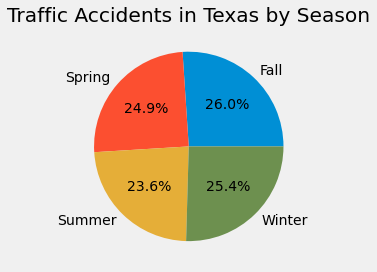

In [30]:
#Creating the seasonal pie chart

plt.style.use("fivethirtyeight")
slices = [64670, 61900, 58544,63184]
labels = ["Fall", "Spring", "Summer", "Winter"]

plt.pie(slices, labels=labels, autopct='%1.1f%%')
plt.title("Traffic Accidents in Texas by Season")
plt.tight_layout()


Does season mattern in the number of accidents in Texas?

No, there is no correlation between the time the year and the number of accidents.  Actually, accidents in Texas are spread out pretty evenly throughout the year.

In [53]:
#Creat Data to review accidents by weather condition

wcond_df=traffic_df[['Weather_Condition', 'Severity']]
wcondgroup_df=wcond_df.groupby(['Weather_Condition'])
wcondgroup_df.count()

,Severity
Weather_Condition,
Blowing Dust,3
Blowing Dust / Windy,28
Clear,59837
Cloudy,9155
Cloudy / Windy,219
...,...
Thunderstorm,419
Thunderstorms and Rain,307
Thunderstorms and Snow,1


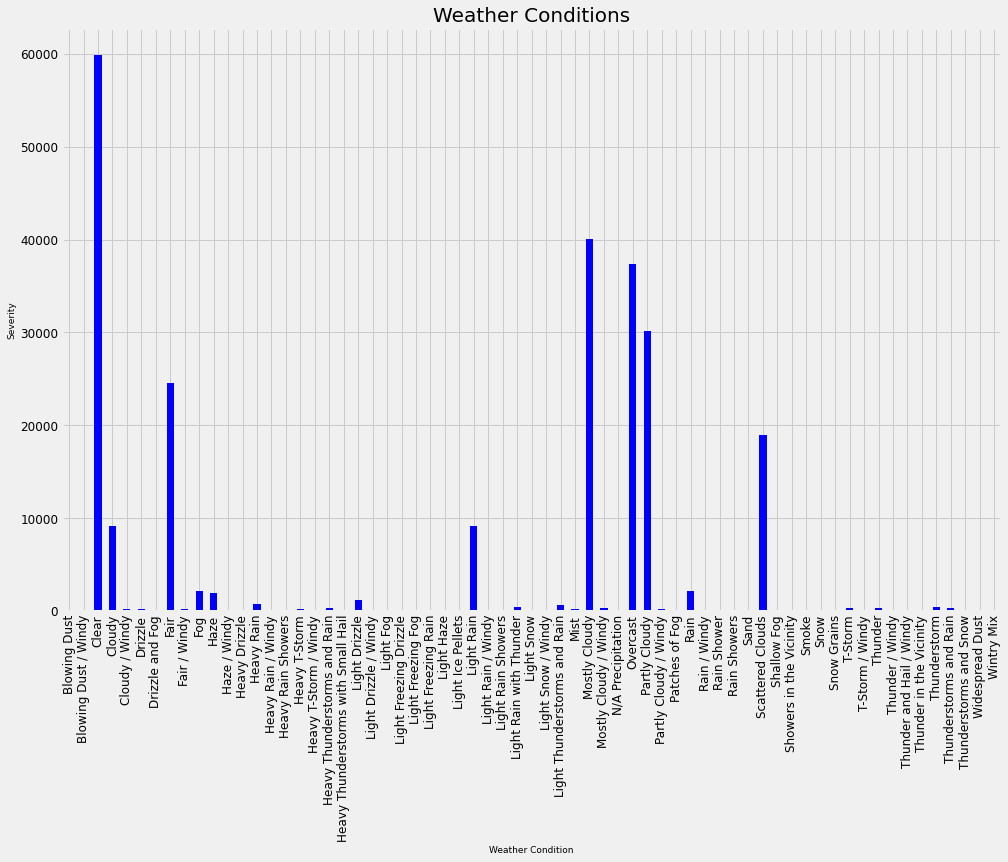

In [93]:
#Generating a bar plot showing the severity of accident by weather condition
wcond_df=traffic_df.groupby(['Weather_Condition']).count()['Severity']
plot_pd=wcond_df.plot.bar(figsize=(15,10), color='b', fontsize=12)


wcond_df

#Formatting

plt.xlabel("Weather Condition", fontsize=9)
plt.ylabel("Severity", fontsize=9)
plt.title("Weather Conditions", fontsize=20)

plt.tight_layout
plt.show()

In [79]:
cond_df=traffic_df[['Weather_Condition', 'Severity']]
wcondgroup_df=wcond_df.groupby(['Weather_Condition'])
wcondgroup_df.head(15)

,Weather_Condition,Severity
0,Clear,2
1,Clear,2
2,Clear,2
3,Partly Cloudy,2
4,Clear,2
...,...,...
242218,Light Rain Showers,3
243989,Rain Showers,2
245111,Showers in the Vicinity,3
245407,Showers in the Vicinity,2


In [80]:
vis_df=traffic_df[['Visibility(mi)', 'Severity']]
visgroup_df=vis_df.groupby(['Visibility(mi)'])
visgroup_df.count().head()

,Severity
Visibility(mi),
0.00,60
0.06,5
0.10,162
0.12,11
0.20,1245


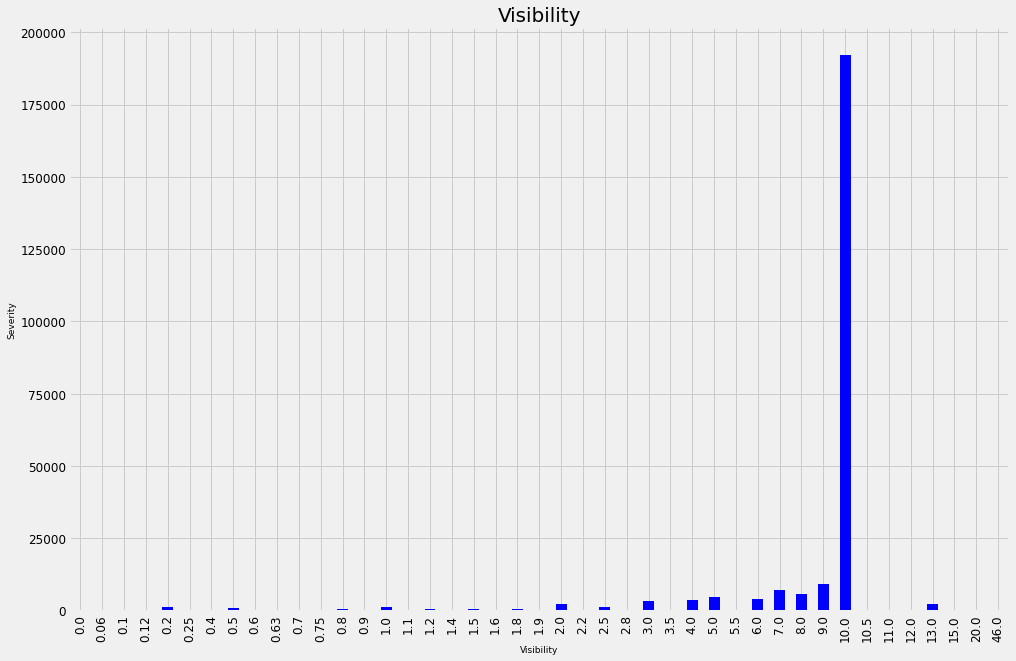

In [94]:
#Generating a bar plot showing the severity of accident by visibility
vis_df=traffic_df.groupby(['Visibility(mi)']).count()['Severity']
plot_pd=vis_df.plot.bar(figsize=(15,10), color='b', fontsize=12)


vis_df

#Formatting

plt.xlabel("Visibility", fontsize=9)
plt.ylabel("Severity", fontsize=9)
plt.title("Visibility", fontsize=20)

plt.tight_layout
plt.show()

In [63]:
tod_df=traffic_df[['Sunrise_Sunset', 'Severity']]
todgroup_df=tod_df.groupby(['Sunrise_Sunset'])
todgroup_df.count()

,Severity
Sunrise_Sunset,
Day,193115
Night,55183


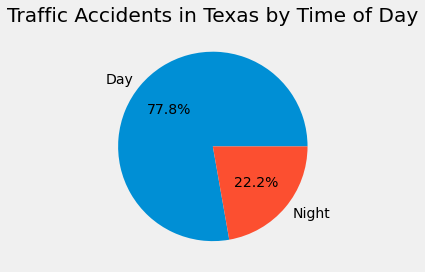

In [77]:
#Creating the seasonal pie chart

plt.style.use("fivethirtyeight")
slices = [193115,55183]
labels = ["Day","Night"]

plt.pie(slices, labels=labels, autopct='%1.1f%%')
plt.title("Traffic Accidents in Texas by Time of Day")
plt.tight_layout()